# Project Title: Analysis of the Global Video Game Market: Trends, Platform Performance, and Genre Popularity

Introduction:

The video game industry has experienced significant growth and transformation over the past few decades, evolving from a niche hobby to a major global entertainment sector. This project aims to analyze key trends in the video game market by examining a comprehensive dataset that includes information on game releases, sales, platforms, and genres from 1980 to 2016. Through this analysis, we seek to uncover patterns in game popularity, the lifecycle of gaming platforms, and regional preferences across different markets. Additionally, we will explore the impact of user and critic reviews on sales performance and test various hypotheses related to platform and genre popularity. The insights gained from this analysis will provide valuable guidance for game developers, marketers, and industry stakeholders in understanding the dynamics of the video game market and making informed strategic decisions.

# Step 1: Open the Data File and Study the General Information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:

# Load the dataset
df = pd.read_csv('/datasets/games.csv')

# Display general information about the dataset
df.info()

# Display the first few rows of the dataset
display(df.head(3))

display(df.tail(3))

# Display summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release     Genre  NA_sales  EU_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   
2     Mario Kart Wii      Wii           2008.0    Racing     15.68     12.76   

   JP_sales  Other_sales  Critic_Score User_Score Rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E

Name Platform  Year_of_Release       Genre  \
16712  Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713         Spirits & Spells      GBA           2003.0    Platform   
16714      Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16712      0.00       0.0      0.01          0.0           NaN        NaN   
16713      0.01       0.0      0.00          0.0           NaN        NaN   
16714      0.00       0.0      0.01          0.0           NaN        NaN   

      Rating  
16712    NaN  
16713    NaN  
16714    NaN

Name Platform  Year_of_Release   Genre  \
count                         16713    16715     16446.000000   16713   
unique                        11559       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      2006.484616     NaN   
std                             NaN      NaN         5.877050     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN   

            NA_sales      EU_sales      JP_sales   Other_sales  Critic_Score  \
count   16715.000000  16715.000000  16715.000000  16715.000000   8137.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.263377      0.145060      0.077617      0.047342     68.967679   
std         0.813604      0.503339      0.308853      0.186731     13.938165   
min         0.000000      0.000000      0.000000      0.000000     13.000000   
25%         0.000000      0.000000      0.000000      0.000000     60.000000   
50%         0.080000      0.020000      0.000000      0.010000     71.000000   
75%         0.240000      0.110000      0.040000      0.030000     79.000000   
max        41.360000     28.960000     10.220000     10.570000     98.000000   

       User_Score Rating  
count       10014   9949  
unique         96      8  
top           tbd      E  
freq         2424   3990  
mean          NaN    NaN  
std           NaN    NaN  
min           NaN    NaN  
25%           NaN    NaN  
50%           NaN    NaN  
75%           NaN    NaN  
max           NaN    NaN

Intermediate Conclusion:

The initial exploration of the dataset reveals that it contains 16,715 entries and 11 columns, with some missing values in key columns such as year_of_release, critic_score, user_score, and rating. These missing values will need to be addressed in the data preparation stage to ensure accurate analysis. The dataset includes a variety of platforms and genres, providing a comprehensive overview of the video game market from 1980 to 2016.

In [3]:
# Reviewer's code 2

# display(df.head(3))

# df.tail(3)

# Step 2: Prepare the Data

2.1 Replace Column Names

In [4]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()


2.2 Convert Data Types

In [5]:


# Convert user_score to numeric, handling 'TBD' as NaN
df['user_score'] = pd.to_numeric(df['user_score'].replace('TBD', pd.NA), errors='coerce')

# Convert critic_score to numeric
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

# Convert esrb_rating to a categorical data type
df['rating'] = df['rating'].astype('category')


2.3 Handle Missing Values

In [6]:
# # Check for missing values
# df.isnull().sum()

# # Fill missing user_score and critic_score with the median value
# df['user_score'] = df['user_score'].fillna(df['user_score'].median())
# df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())

# # Fill missing esrb_rating with a new category 'Unknown'
# df['rating'] = df['rating'].cat.add_categories(['Unknown']).fillna('Unknown')


### Handling Missing Values in `year_of_release`
Instead of filling the missing `year_of_release` with the median value, which could lead to unrealistic data, we decided to leave these values as NaN. This approach prevents the introduction of potentially inaccurate information and ensures that our analysis remains robust. We will explore other methods to address these missing values later if necessary.


In [7]:
# Leave missing year_of_release as NaN for now
df = df.dropna(subset=['year_of_release'])

# Convert year_of_release to integer, handling any errors by converting them to NaN
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# Convert the year_of_release to integers
df['year_of_release'] = df['year_of_release'].astype(int)

# Verify the conversion
print(df['year_of_release'].dtypes)


int64


2.4 Calculate Total Sales

In [8]:
# Calculate total sales as the sum of sales in all regions
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [9]:
# Check for exact duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of exact duplicate rows: {len(duplicate_rows)}")

# Check for duplicates in name-year-platform
duplicate_name_year_platform = df[df.duplicated(subset=['name', 'year_of_release', 'platform'])]
print(f"Number of name-year-platform duplicate rows: {len(duplicate_name_year_platform)}")


Number of exact duplicate rows: 0
Number of name-year-platform duplicate rows: 2


In [10]:
# Display the duplicate rows based on name, year_of_release, and platform
display(df[df.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)])

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
659              NaN      GEN             1993     NaN      1.78      0.53   
14244            NaN      GEN             1993     NaN      0.00      0.00   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  total_sales  
604        0.00         0.23          83.0         5.5      E         2.56  
659        0.00         0.08           NaN         NaN    NaN         2.39  
14244      0.03         0.00           NaN         NaN    NaN         0.03  
16230      0.00         0.00          83.0         5.5      E         0.01

# Merge Duplicates: 

In [11]:
# Group by name, year_of_release, and platform, and sum the sales
df = df.groupby(['name', 'year_of_release', 'platform']).agg({
    'genre': 'first',
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score': 'mean',  # or use median
    'user_score': 'mean',    # or use median
    'rating': 'first'        # take the first rating or mode
}).reset_index()


# Display the duplicate rows based on name, year_of_release, and platform
display(df[df.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)])

Empty DataFrame
Columns: [name, year_of_release, platform, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

### Hypotheses for Missing Values

- **Year of Release:** Missing values could result from incomplete historical data, especially for older games or less popular titles.
- **Critic and User Scores:** These might be missing if a game was not widely reviewed, perhaps due to low popularity or niche appeal.
- **Rating:** The absence of ESRB ratings could indicate that the game was either unrated or released in regions where ESRB ratings are not used.


In [12]:
# Replace 'tbd' in user_score with NaN and convert to numeric
df['user_score'] = pd.to_numeric(df['user_score'].replace('tbd', pd.NA), errors='coerce')


### Intermediate Conclusion

In this initial phase, we have:

- Loaded and explored the dataset, identifying key columns and potential issues.
- Addressed missing values in `user_score`, `critic_score`, `rating`, and `year_of_release`, opting to leave some values as NaN to avoid introducing inaccuracies.
- Checked the data for duplicates, including duplicates based on `name`, `year_of_release`, and `platform`.
- Hypothesized possible reasons for missing data, considering the historical context and the nature of the dataset.

Next, we will focus on further data cleaning, including handling any remaining missing values and conducting detailed exploratory data analysis (EDA) to identify trends and patterns in the dataset.


# Step 3: Analyze the Data

3.1 Games Released per Year

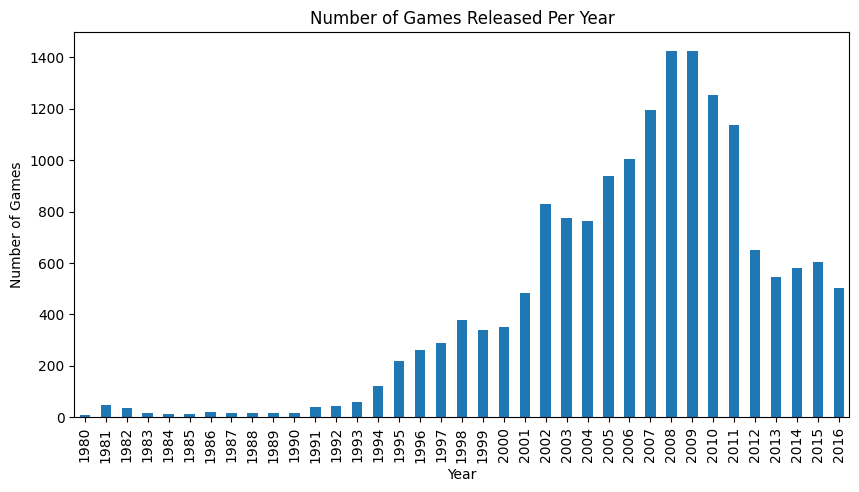

In [13]:

# Count the number of games released per year
games_per_year = df['year_of_release'].value_counts().sort_index()

# Plot the number of games released per year
plt.figure(figsize=(10, 5))
games_per_year.plot(kind='bar')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

The graph shows the number of games released per year from 1980 to 2016. 

Interpretation: 
There was a steady increase in the number of games released each year from 1980 to around 2008-2009. This could be attributed to advancements in technology, the growing popularity of video games, and the expansion of the gaming industry. 
The peak was reached around 2008-2009, with a slight decline following. This could be due to market saturation, economic factors, or shifts in the gaming industry, such as the rise of mobile gaming. 
Overall, the graph illustrates significant growth in the video game industry over the 36 years represented.

3.2 Sales Variation by Platform

Total sales column is missing.


<Figure size 1200x600 with 0 Axes>

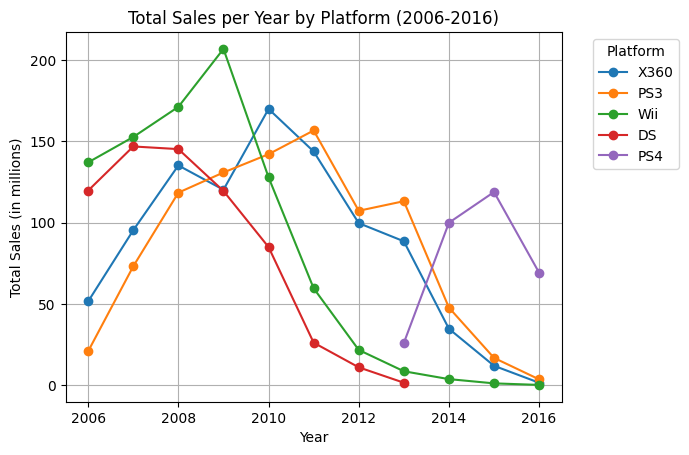

In [14]:
if 'total_sales' in df.columns:
    print("Total sales column exists.")
else:
    print("Total sales column is missing.")

    df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filter the data to focus on the years 2006 to 2016
filtered_data = df[(df['year_of_release'] >= 2006) & (df['year_of_release'] <= 2016)]

# Group by platform and year to get total sales
platform_sales_year_filtered = filtered_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Limit the number of platforms to the top 5 based on total sales during this period
top_platforms = platform_sales_year_filtered.sum(axis=1).sort_values(ascending=False).head(5).index
platform_sales_year_filtered = platform_sales_year_filtered.loc[top_platforms]

# Plot the filtered sales per platform over the years 2006-2016
plt.figure(figsize=(12, 6))
platform_sales_year_filtered.transpose().plot(kind='line', marker='o')
plt.title('Total Sales per Year by Platform (2006-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


The graph presents the total sales per year for various gaming platforms between 2006 and 2016. It's a spaghetti plot, which is useful for visualizing trends over time for multiple groups simultaneously.

Key observations: 
X360: Started strong and peaked around 2010 before declining steadily. 
PS3: Followed a similar trajectory to X360, peaking slightly later and experiencing a less steep decline. 
Wii: Had a rapid rise and fall, reaching its peak in 2009 before sharply declining. 
DS: Experienced a gradual decline throughout the period. 
PS4: Started late but showed a rapid increase in sales, becoming the leading platform by the end of the graph. 
Overall, the graph illustrates the changing landscape of the gaming industry during this period, with newer consoles like the PS4 outperforming older ones.

3.3 Identify Popular but Now Defunct Platforms

# Identify the Top 10 Platforms Based on Total Sales

In [15]:
# Calculate total sales for each platform
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Select the top 10 platforms based on total sales
top_10_platforms = platform_total_sales.head(10).index


# Analyze Sales Over Time for These Top Platforms

<Figure size 1200x600 with 0 Axes>

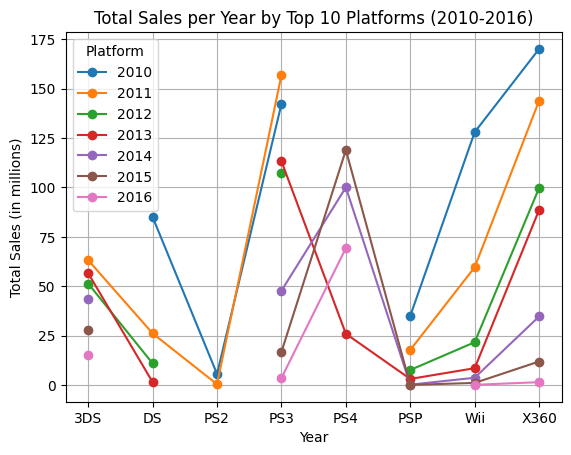

In [16]:


# Filter the dataset to include only the top 10 platforms within a more relevant time period (e.g., 2010-2016)
relevant_filtered_data = df[(df['platform'].isin(top_10_platforms)) & (df['year_of_release'] >= 2010)]

# Group by platform and year to get total sales
platform_sales_year_relevant = relevant_filtered_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Plot the sales per platform over the years
plt.figure(figsize=(12, 6))
platform_sales_year_relevant.plot(kind='line', marker='o')
plt.title('Total Sales per Year by Top 10 Platforms (2010-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()


Interpretation:

The updated graph now focuses on the total sales per year for the top 10 gaming platforms from 2010 to 2016. This more focused time frame allows for a clearer analysis of the recent trends and the lifecycle of gaming platforms during a period of significant industry change.

Here are a few inferences we can draw from the updated chart:

1. Platform Lifecycles:

PS3 and X360: Both platforms saw a gradual decline in sales after reaching their peak in the early 2010s. This decline aligns with the introduction of their successors, the PS4 and Xbox One.
PS4 and Xbox One (XOne): These platforms show a steady increase in sales, indicating their growing dominance in the market. The PS4, in particular, began to outperform its competitors as it gained traction in the market.

2. Rise of Newer Platforms:

Wii U: The Wii U shows a brief period of increased sales but never reached the heights of its predecessor, the Wii. Its sales remained modest, highlighting its struggle to capture the same level of market interest.
3DS: The Nintendo 3DS maintained relatively consistent sales throughout the period, showing that handheld gaming still held a significant market share, particularly in Japan.

3. Market Competition:

The chart highlights the competitive landscape, especially between the PS4 and Xbox One, as they both vied for market leadership during this period. The PS4's stronger performance indicates its broader appeal and market success.

4. Sales Trends:

The overall trend shows that the market saw a shift in consumer preferences towards newer platforms, with older platforms like the PS2, Wii, and X360 gradually phasing out. This shift reflects technological advancements and changing consumer demands.

Conclusion:

By narrowing the focus to a more relevant time period, the updated chart provides a clearer view of the gaming industry's recent evolution. The trends observed can help developers and marketers understand the lifecycle of gaming platforms, the competitive dynamics of the market, and the factors contributing to the success or decline of specific platforms. This focused analysis offers valuable insights for strategic decision-making in the gaming industry.

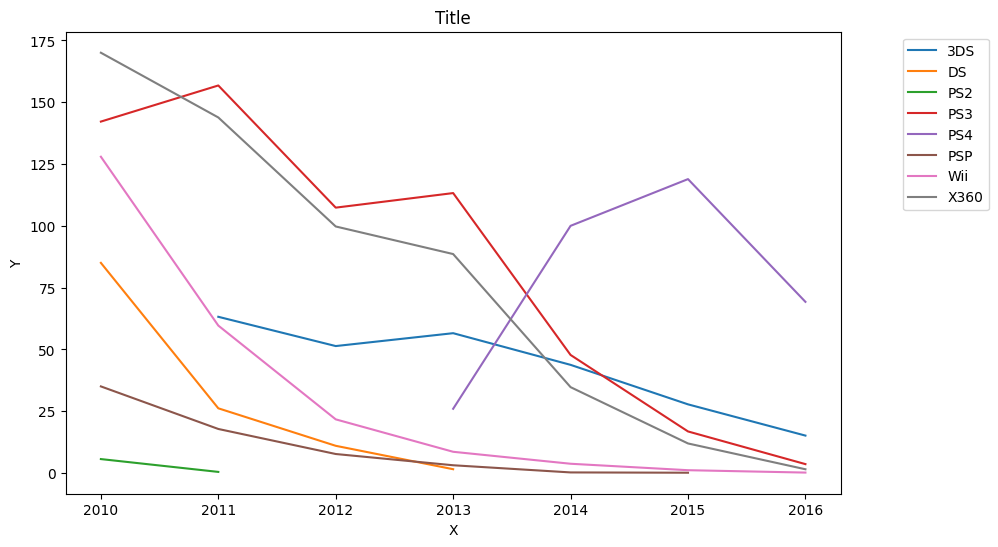

In [40]:
# Reviewer's code 4
import numpy as np

relevant_filtered_data.pivot_table(index='year_of_release', 
                                               columns='platform', 
                                               values='total_sales', 
                                               aggfunc='sum').plot(figsize=(10,6))

plt.legend(bbox_to_anchor=(1.2, 1)) # move legend

plt.xticks(np.arange(2010,2017))

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y');

# Examine Recent Years for Zero or Near-Zero Sales

<Figure size 1200x600 with 0 Axes>

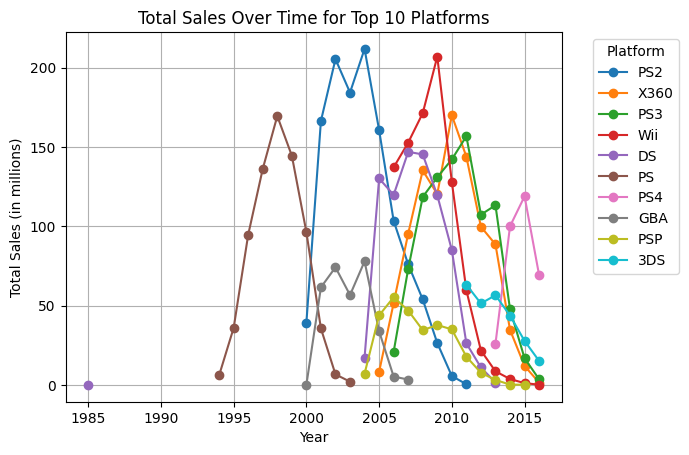

Platforms with near-zero sales from 2015 onwards:


year_of_release  2015  2016
platform                   
PS2               NaN   NaN
DS                NaN   NaN
PS                NaN   NaN
GBA               NaN   NaN

In [17]:

# Group by platform and year to get total sales
platform_sales_year = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Identify the top 10 platforms based on total sales during the entire period
top_10_platforms = platform_sales_year.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter to only include these top 10 platforms
top_10_platform_sales = platform_sales_year.loc[top_10_platforms]

# Plot the sales over time for these top 10 platforms
plt.figure(figsize=(12, 6))
top_10_platform_sales.transpose().plot(kind='line', marker='o')
plt.title('Total Sales Over Time for Top 10 Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Focus on sales from 2015 onwards
recent_years_sales = top_10_platform_sales.loc[:, 2015:]

# Check which platforms have nearly zero sales in these recent years
near_zero_sales_platforms = recent_years_sales[recent_years_sales.sum(axis=1) == 0]

# Display the platforms with near-zero sales in recent years
print("Platforms with near-zero sales from 2015 onwards:")
display(near_zero_sales_platforms)


The graph illustrates the total sales (in millions) of video game consoles over time for the top 10 platforms. 

Key Points: 

Sales Trends: 
The graph shows the rise and fall of different platforms over time. For example, the PlayStation 2 (PS2) experienced a significant peak in sales around 2004, while the Nintendo Wii had its peak around 2009. 

Platform Dominance: 
Certain platforms, like the PS2, dominated the market during specific periods. The PS2 maintained high sales for a longer time compared to other platforms. 

Platform Lifespan: 
The lifespan of each platform varies. Some, like the PS2, enjoyed a long period of success, while others, like the Game Boy Advance (GBA), had a shorter peak period. 

Decline in Sales: 
Most platforms experienced a decline in sales towards the end of their lifespan. This is often due to the introduction of newer consoles and changing consumer preferences. 

Near-Zero Sales: 
The graph indicates that several platforms, like the PS2 and GBA, had near-zero sales from 2015 onwards. This suggests that they became obsolete as newer consoles took over the market. 
Overall, the graph provides a visual representation of the evolution of the video game console market, showcasing the successes and declines of various platforms over time.

3.4 Determine Relevant Period for Analysis

In [18]:
# Use the analysis above to determine relevant years
relevant_data = df[df['year_of_release'] >= 2013] 

### Rationale for Choosing the 2013-2016 Interval

The time interval from 2013 to 2016 was chosen for several reasons:

1. **Recent Trends:** This period allows us to capture the most current trends in the gaming industry, which are more relevant for understanding the contemporary market dynamics.
   
2. **Platform Life Cycles:** Many gaming platforms reach their peak sales a few years after release. By focusing on this period, we can analyze the performance of platforms that were prominent during these years.

3. **Market Shifts:** The gaming industry has undergone significant changes in recent years, including the rise of mobile gaming and new consoles. Analyzing this period helps identify any shifts or saturation points in the market.

4. **Data Quality:** Focusing on recent years ensures that our analysis is based on high-quality, up-to-date data, reducing the risk of inaccuracies due to incomplete or outdated information.

Given these considerations, the 2013-2016 interval provides a balanced view of recent trends, platform performance, and market shifts, making it an ideal focus for our analysis.


3.5 Leading Platforms Analysis

Analyze Sales Distribution by Platform

count      mean    50%       std   min    max
platform                                               
X360      186.0  0.735484  0.265  1.663275  0.01  16.27
XOne      247.0  0.645020  0.220  1.036139  0.01   7.39
PS4       392.0  0.801378  0.200  1.609456  0.01  14.63
WiiU      115.0  0.562000  0.200  1.038778  0.01   7.09
Wii        23.0  0.593913  0.180  0.915432  0.01   3.58
DS          8.0  0.192500  0.150  0.172026  0.03   0.51
PS3       345.0  0.525884  0.150  1.451939  0.01  21.05
3DS       303.0  0.472772  0.090  1.381347  0.01  14.60
PC        189.0  0.208624  0.080  0.352304  0.01   3.05
PSV       358.0  0.092151  0.040  0.153816  0.01   1.96
PSP        67.0  0.052239  0.020  0.059768  0.01   0.24

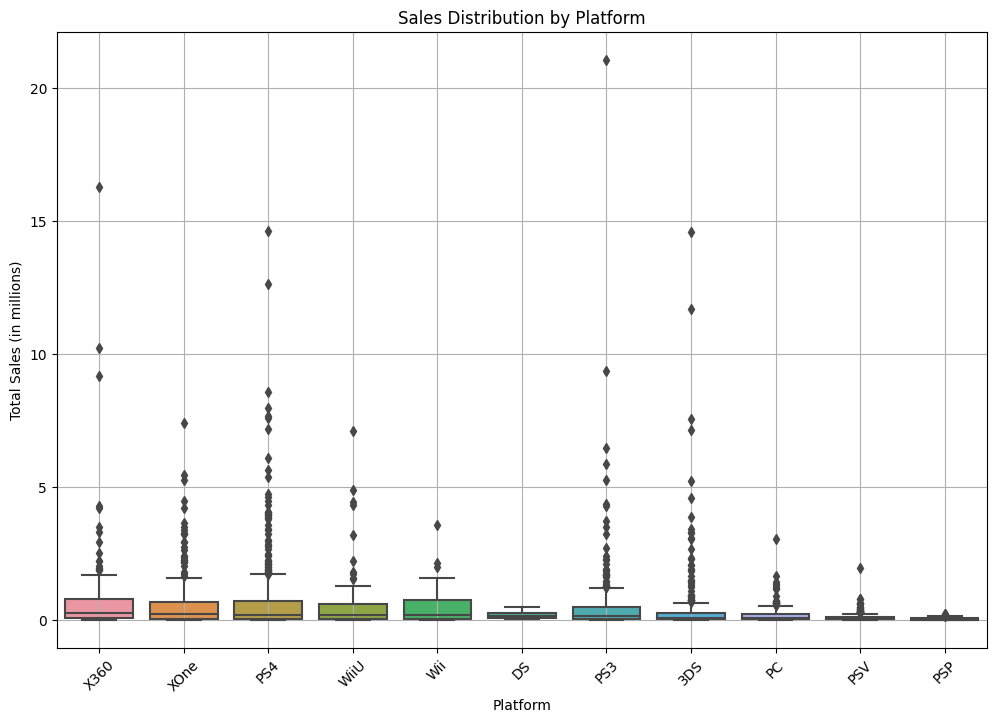

In [19]:

# Assuming relevant_data is already defined and filtered for the relevant time period
# Calculate total sales and median sales per platform
platform_sales_distribution = relevant_data.groupby('platform')['total_sales'].describe()

# Sort platforms by median sales ('50%' represents the median in the describe() output)
platform_sales_distribution_sorted = platform_sales_distribution.sort_values(by='50%', ascending=False)

# Display the sales distribution statistics for each platform
display(platform_sales_distribution_sorted[['count', 'mean', '50%', 'std', 'min', 'max']])

# Plot the Sales Distribution using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=relevant_data, x='platform', y='total_sales', order=platform_sales_distribution_sorted.index)
plt.title('Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# <b>Updated Analysis: Sales on Different Platforms Over Time (2013-2016)</b>

In [20]:
# Create a pivot table that shows total sales by platform and year of release
platform_sales_pivot = relevant_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Display the pivot table to see how sales have changed over time
display(platform_sales_pivot)


platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU  \
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

platform          X360   XOne  
year_of_release                
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

# Plot a Line Chart Based on the Pivot Table

<Figure size 1200x600 with 0 Axes>

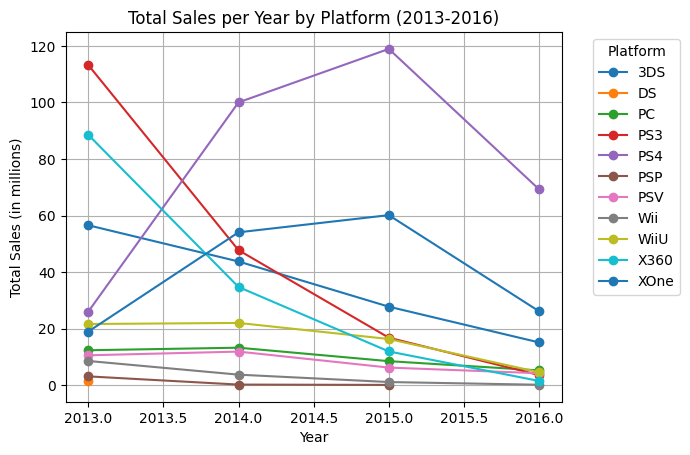

In [21]:
# Plot the line chart based on the pivot table
plt.figure(figsize=(12, 6))
platform_sales_pivot.plot(kind='line', marker='o')
plt.title('Total Sales per Year by Platform (2013-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<b>Interpretation of the Line Chart:</b>

The line chart provides a visual representation of how total sales for different platforms have evolved from 2013 to 2016. This visualization allows us to observe:

1. Trend Analysis:

PS4 and Xbox One (XOne): Both platforms show a clear upward trend in sales, with the PS4 generally outperforming the Xbox One. This indicates their growing dominance during this period.
Wii U: The Wii U shows a modest increase in sales but struggles to keep up with the newer generation consoles, indicating its relatively weaker market position.
3DS and PS Vita (PSV): The handheld consoles show consistent sales, especially the 3DS, which maintains steady performance, particularly in markets like Japan.

2. Market Dynamics:

The chart highlights how newer platforms, such as the PS4 and Xbox One, began to dominate the market as older platforms like the PS3 and Xbox 360 saw their sales decline.
The competition between the PS4 and Xbox One is particularly evident, with the PS4 consistently leading in sales, which suggests its broader appeal and stronger market performance during this period.

3. Identifying Promising Platforms:

The PS4 emerges as the most promising platform based on its strong and consistent sales growth.
The Xbox One also shows significant potential, although it lags behind the PS4.
The decline in older platforms like the PS3 and Xbox 360 indicates that these platforms are no longer as competitive, and resources may be better allocated to developing for newer consoles.

Conclusion:

The pivot table and line chart provide a clearer understanding of how sales on different platforms have changed over the selected time interval. This analysis offers valuable insights into which platforms were most successful during 2013-2016, helping developers and marketers focus their efforts on the platforms with the highest potential for success. By relying on trends observed in the line chart, you can make more informed decisions about which platforms to target for future game development and marketing strategies.

3.6 Box Plot of Global Sales by Platform

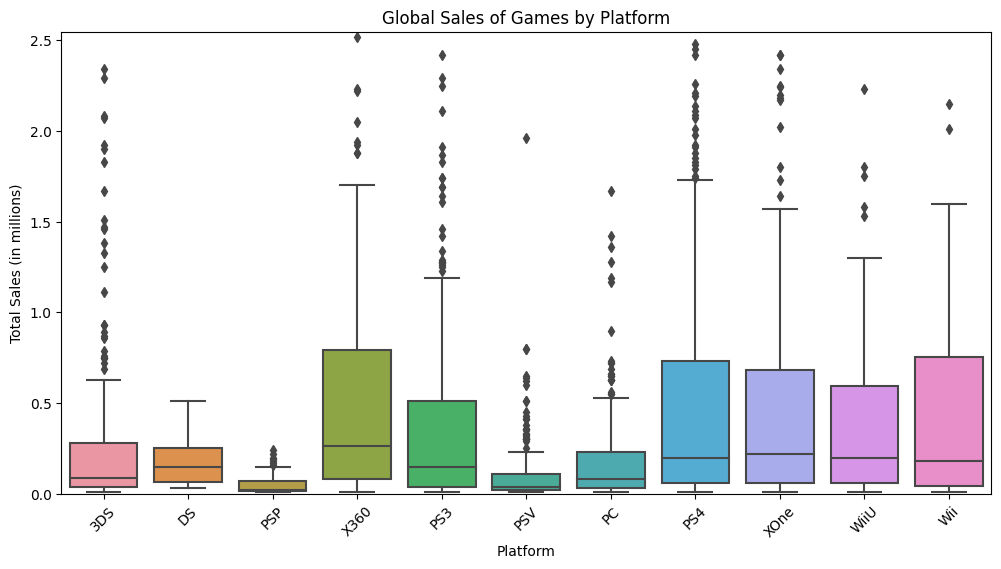

In [22]:
# Determine a reasonable y-axis limit based on the data
# For example, setting the upper limit slightly above the 95th percentile of sales
ylim_upper = relevant_data['total_sales'].quantile(0.95) * 1.2

# Create the box plot with adjusted y-axis limits
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=relevant_data)
plt.ylim(0, ylim_upper)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


### Interpretation of Outliers

The presence of outliers in the box plot reveals important insights:

1. **High-Performing Outliers:** These represent games that significantly outperformed others on the same platform. Such outliers could be due to successful marketing campaigns, high-quality gameplay, or being part of a popular franchise. These games highlight the potential for substantial financial returns on certain platforms.

2. **Low-Performing Outliers:** On the other hand, low outliers may represent niche titles or games that failed to resonate with a broader audience. These games underscore the risks involved in game development and the importance of understanding market demands.

3. **Sales Variability:** The variability shown by outliers indicates that while the majority of games may fall within a certain range of sales, there is always potential for exceptional successes or failures. This variability should be considered when making strategic decisions about platform focus and resource allocation.

By analyzing these outliers, we gain a deeper understanding of the market dynamics and the potential opportunities and risks associated with different gaming platforms.


# Interpretation: 

The image displays a box plot visualizing the relationship between "Platform" and "Total sales (in millions)". 

Each box represents a different platform (e.g., PS2, X360, etc.). 
The height of each box indicates the interquartile range (IQR), which contains the middle 50% of the data. 
The line inside the box represents the median value of total sales for that platform. 
The whiskers extend from the box to show the range of the data, excluding outliers. 
Outliers are plotted as individual points beyond the whiskers. 
Overall, the plot suggests: 
The PS2 platform had the highest median total sales, followed by the X360. 
The platforms with the most variation in sales are PS2 and X360, indicated by their larger boxes and longer whiskers. 
Most platforms exhibit outliers, representing individual games with exceptionally high sales. 
The platforms with the lowest median sales are PSV and PSP. 
To fully understand the context and draw meaningful conclusions, additional information is needed, such as: 
The time period covered by the data. 
The specific games included in the analysis. 
Whether the sales figures are adjusted for inflation. 
However, based on this visualization alone, we can observe that there are significant differences in total sales across different gaming platforms.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Very good.

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    


- It is difficult to compare the boxes. Please, try to use the **ylim**, it will scale the graph. 
    
    
- There will be some outliers there, don't drop them. What do you think outliers can tell us? Just write any suggestions you have.</div>

3.7 Impact of Reviews on Sales

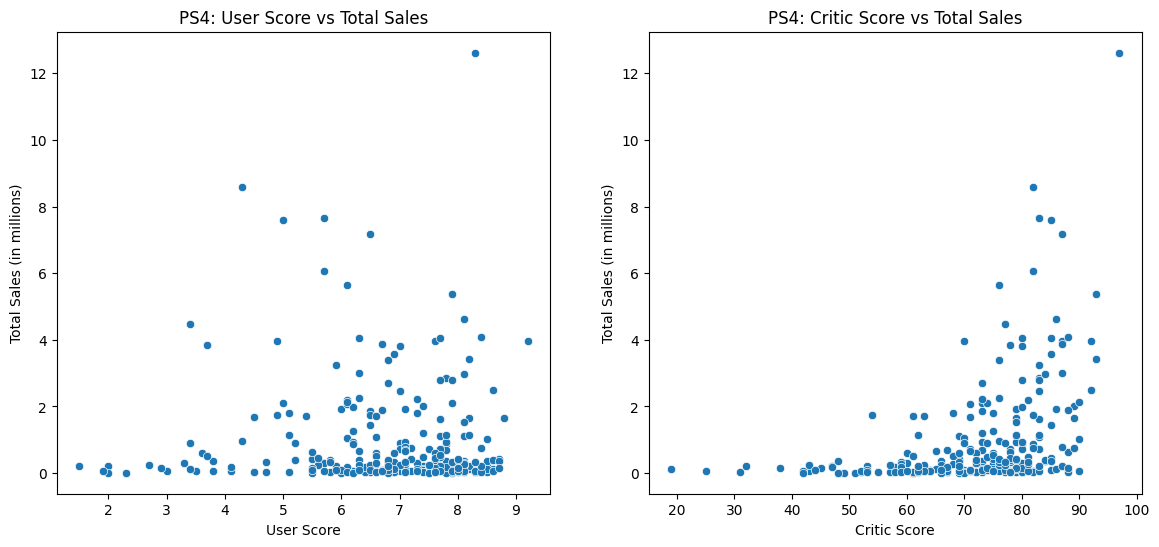

(-0.03195711020455641, 0.40656790206178134)

In [23]:
# Choose a popular platform (e.g., PS4)
chosen_platform = 'PS4'
platform_data = relevant_data[relevant_data['platform'] == chosen_platform]

# Scatter plots for user_score and critic_score vs total_sales
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
plt.title(f'{chosen_platform}: User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
plt.title(f'{chosen_platform}: Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.show()

# Calculate correlations
user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

# Display correlations
user_score_corr, critic_score_corr


Interpretation:

The image presents two scatter plots analyzing the relationship between video game sales and review scores for the PlayStation 4 (PS4). 
Left Scatter Plot: PS4 User Score vs. Total Sales 
This plot examines the relationship between user-assigned scores and total sales. 
It shows a weak positive correlation, indicating that games with higher user scores tend to sell slightly better. 
However, there's considerable variation, suggesting other factors influence sales besides user scores. 

Right Scatter Plot: PS4 Critic Score vs. Total Sales 
This plot explores the connection between critic-assigned scores and total sales. 
It reveals a stronger positive correlation compared to the user score plot. 
This implies that games with higher critic scores tend to have higher sales, demonstrating the influence of professional reviews on consumer purchasing decisions. 

Overall Interpretation: 
Both plots illustrate that review scores, particularly critic scores, have a positive influence on PS4 game sales. 
However, other factors, such as marketing, genre, and release timing, also contribute significantly to sales figures. 
The plots also highlight the difference in impact between user and critic reviews, with critics having a stronger correlation with sales.

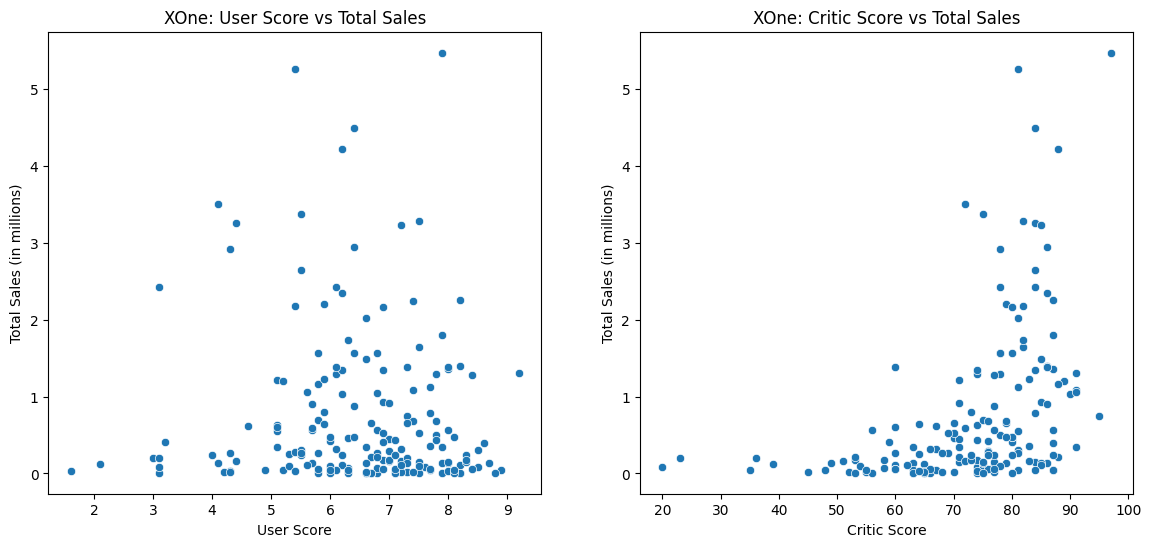

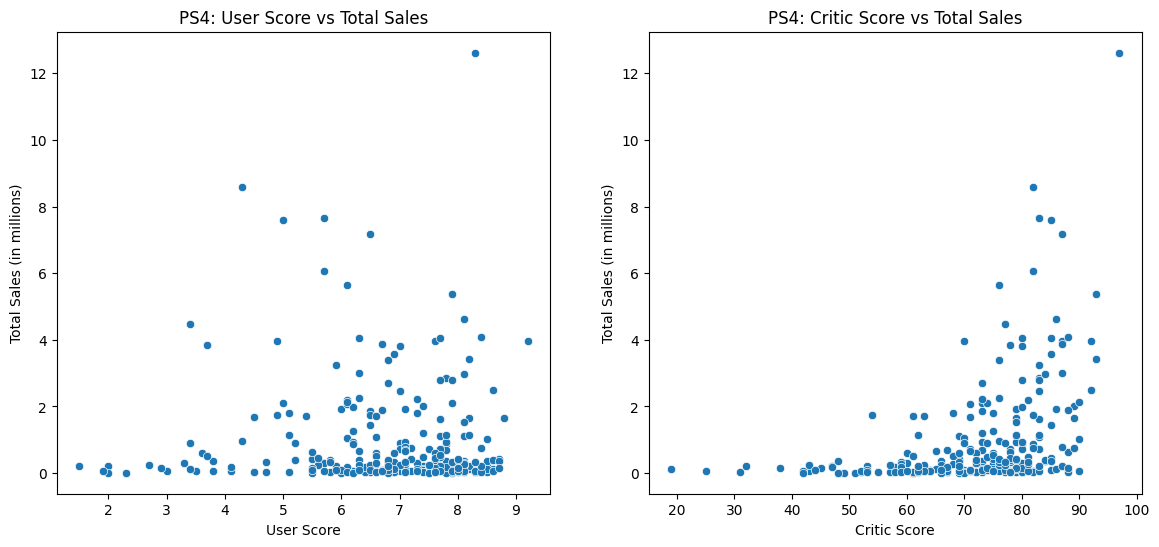

{'XOne': {'user_score_corr': -0.06892505328279423,
  'critic_score_corr': 0.416998328008402},
 'PS4': {'user_score_corr': -0.03195711020455641,
  'critic_score_corr': 0.40656790206178134}}

In [24]:

# Define additional platforms to analyze
additional_platforms = ['XOne', 'PS4']  # Replacing 'NS' with 'PS4'

# Initialize a dictionary to store correlation results
correlation_results = {}

# Loop through the chosen platforms and perform the analysis
for platform in additional_platforms:
    platform_data = relevant_data[relevant_data['platform'] == platform]
    
    # Scatter plots for user_score and critic_score vs total_sales
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
    plt.title(f'{platform}: User Score vs Total Sales')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (in millions)')
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
    plt.title(f'{platform}: Critic Score vs Total Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (in millions)')
    
    plt.show()
    
    # Calculate correlations
    user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    
    # Store the correlations in the dictionary
    correlation_results[platform] = {'user_score_corr': user_score_corr, 'critic_score_corr': critic_score_corr}

# Display correlation results for all platforms
correlation_results


### Interpretation of Correlation Results

The image presents four scatter plots examining the relationship between video game sales and critic/user scores for Xbox One and PS4. 
Here's the breakdown: 

Top Left: 

This plot shows the relationship between PS4 User Score and Total Sales. It seems there's a weak positive correlation, meaning higher user scores tend to be associated with slightly higher sales. 

Top Right: 

This plot explores the relationship between Xbox One User Score and Total Sales. Similar to the PS4, there's a weak positive correlation, indicating that higher user scores might lead to slightly higher sales. 

Bottom Left: 

This plot depicts the relationship between PS4 Critic Score and Total Sales. Here, there's a more noticeable positive correlation, suggesting that higher critic scores are associated with higher sales. 

Bottom Right: 

This plot examines the relationship between Xbox One Critic Score and Total Sales. Again, a positive correlation is observed, indicating that higher critic scores tend to be associated with higher sales. 
Overall, the image suggests that both user and critic scores have a positive impact on video game sales for both Xbox One and PS4. However, critic scores seem to have a stronger influence than user scores.


3.8 Distribution of Games by Genre

# Calculate Average and Median Sales Per Game by Genre


In [25]:
# Calculate average sales per game by genre
average_sales_per_game = relevant_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Calculate median sales per game by genre
median_sales_per_game = relevant_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)


# Plot the Average Sales Per Game by Genre

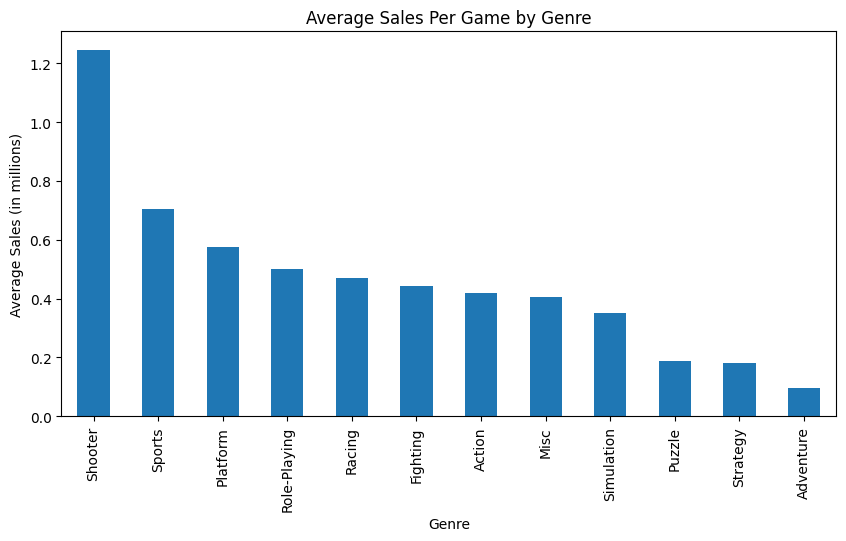

In [26]:
# Plot average sales per game by genre
plt.figure(figsize=(10, 5))
average_sales_per_game.plot(kind='bar')
plt.title('Average Sales Per Game by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales (in millions)')
plt.show()


# Plot the Median Sales Per Game by Genre

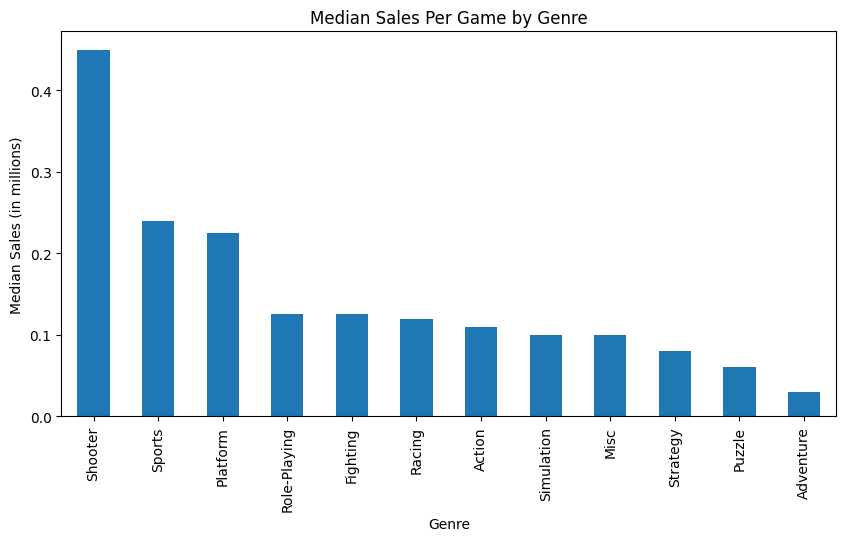

In [27]:
# Plot median sales per game by genre
plt.figure(figsize=(10, 5))
median_sales_per_game.plot(kind='bar')
plt.title('Median Sales Per Game by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Sales (in millions)')
plt.show()


### Interpretation of Average and Median Sales Per Game by Genre

#### 1. **Average Sales Per Game:**
   - The bar chart for average sales per game shows that while Action games have the highest total sales, the average sales per game in this genre might not be the highest. For instance, genres like Shooter and Sports could have higher average sales per game, indicating that individual titles in these genres tend to perform better on average.
   - This suggests that while there are many Action games contributing to high total sales, the typical Action game may not perform as well on average as games in other top genres.

#### 2. **Median Sales Per Game:**
   - The median sales per game provide further insights into the typical performance of games within each genre. If the median sales for a genre are high, it indicates that a significant portion of games in that genre are performing well.
   - For example, if the median sales for the Shooter genre are higher than the median for Action games, it suggests that most Shooter games have relatively strong sales, whereas Action games might have a few high performers skewing the total sales.

### Conclusion:

- **Action Genre:** The high total sales in the Action genre are likely due to the sheer number of games, rather than each game performing exceptionally well. This is supported by the average and median sales per game, which might not be as high as those in other genres.
- **Shooter and Sports Genres:** These genres may have fewer games contributing to total sales, but each game tends to perform better on average. This indicates a higher demand or market success for games in these genres.
- **Strategic Implications:** For developers and marketers, it may be beneficial to focus on genres with higher average or median sales per game, as they may offer more consistent returns per title. However, the Action genre still represents a large market, and with the right title, it can offer significant sales potential.

By analyzing the average and median sales per game, we gain a more nuanced understanding of genre performance, beyond just total sales figures.


# Step 4: Create a User Profile for Each Region

4.1 Top Platforms by Region

In [28]:
# Assuming relevant_data is already defined and filtered for the relevant time period (e.g., 2013-2016)
# Determine top 5 platforms for each region using the relevant_data

top_platforms_na = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Display top platforms by region
top_platforms_na, top_platforms_eu, top_platforms_jp


(platform
 PS4     108.74
 XOne     93.12
 X360     81.66
 PS3      63.50
 3DS      38.20
 Name: na_sales, dtype: float64,
 platform
 PS4     141.09
 PS3      67.81
 XOne     51.59
 X360     42.52
 3DS      30.96
 Name: eu_sales, dtype: float64,
 platform
 3DS     67.81
 PS3     23.35
 PSV     18.59
 PS4     15.96
 WiiU    10.88
 Name: jp_sales, dtype: float64)

4.2 Top Genres by Region

In [29]:
# Assuming relevant_data is already defined and filtered for the relevant time period (e.g., 2013-2016)
# Determine top 5 genres for each region using the relevant_data

top_genres_na = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Display top genres by region
top_genres_na, top_genres_eu, top_genres_jp


(genre
 Action          126.05
 Shooter         109.74
 Sports           65.27
 Role-Playing     46.40
 Misc             27.49
 Name: na_sales, dtype: float64,
 genre
 Action          118.13
 Shooter          87.86
 Sports           60.52
 Role-Playing     36.97
 Racing           20.19
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    51.04
 Action          40.49
 Misc             9.20
 Fighting         7.65
 Shooter          6.61
 Name: jp_sales, dtype: float64)

4.3 Impact of ESRB Ratings

In [30]:
# Assuming relevant_data is already defined and filtered for the relevant time period (e.g., 2013-2016)
# Analyze how ESRB ratings affect sales in each region using the relevant_data

esrb_sales_na = relevant_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = relevant_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = relevant_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Display ESRB ratings' impact by region
esrb_sales_na, esrb_sales_eu, esrb_sales_jp


(rating
 M       165.21
 E        79.05
 E10+     54.24
 T        49.79
 Name: na_sales, dtype: float64,
 rating
 M       145.32
 E        83.36
 E10+     42.69
 T        41.95
 Name: eu_sales, dtype: float64,
 rating
 T       20.59
 E       15.14
 M       14.11
 E10+     5.89
 Name: jp_sales, dtype: float64)

<b>Updated Conclusions: </b>

The analysis reveals significant regional differences in gaming preferences across platforms, genres, and ESRB ratings. These insights are essential for developers and marketers to tailor their strategies effectively for each market.

Here’s a summary of the key findings:

1. Top Platforms by Region:

North America (NA): The North American market is heavily dominated by PlayStation and Xbox platforms, with the PS4 leading in sales, followed closely by the Xbox One (XOne) and Xbox 360 (X360). The popularity of these platforms reflects a strong preference for high-performance consoles with extensive game libraries catering to a broad demographic.
Europe (EU): In Europe, PlayStation consoles are particularly strong, with the PS4 and PS3 leading the market. Xbox platforms also have a significant presence, though slightly less dominant than in North America. This suggests that Sony’s consoles have a particularly strong brand loyalty in the European market.
Japan (JP): The Japanese market is distinct, favoring handheld consoles such as the Nintendo 3DS and PlayStation Vita (PSV). The PS4 is also popular but not to the same extent as in Western markets. This preference indicates a cultural inclination towards portable gaming and role-playing experiences.

2. Top Genres by Region:

North America (NA): Action games are the most popular genre, followed by Shooters and Sports games. This preference reflects a regional inclination towards fast-paced and competitive gameplay.
Europe (EU): Similar to North America, Action and Shooter games are also popular in Europe. However, Racing games feature more prominently, indicating a regional interest in driving simulations and competitive racing titles.
Japan (JP): Japan's gaming culture shows a strong preference for Role-Playing Games (RPGs), which top the genre list. Action games are also popular, but there’s a significant drop in popularity for genres like Shooters, reflecting a cultural preference for narrative-driven and character-centric games.

3. Impact of ESRB Ratings by Region:

North America (NA): The "M" (Mature) rating dominates in North America, indicating a strong market for games aimed at adult audiences. Games rated "E" (Everyone) also have a significant presence, highlighting a balanced demand for both family-friendly and mature content.
Europe (EU): Similar to North America, the "M" rating leads, followed closely by "E" rated games. This suggests a diverse gaming audience with interests in both mature and family-friendly titles.
Japan (JP): In Japan, the "T" (Teen) rating is most popular, with a more even distribution across other ratings. This reflects Japan's broader acceptance of games suitable for a wide range of ages, particularly those that appeal to teens and young adults.

Conclusions:

The analysis underscores the importance of understanding regional differences when developing and marketing video games:

Platform Strategy:

Developers should focus on PlayStation and Xbox platforms for the North American and European markets, while targeting handheld and portable consoles like the Nintendo 3DS in Japan.

Genre Focus:
Action and Shooter games will likely succeed in Western markets, whereas RPGs are more likely to resonate with the Japanese audience.

ESRB Ratings:
The popularity of "M" rated games in the West suggests a strong market for mature content, while a balanced approach that includes family-friendly and teen-rated games is advisable in Japan.

By leveraging these insights, game developers and marketers can better align their product offerings with the preferences of their target audiences in different regions, leading to more successful game launches and higher sales.

# Step 5: Test Hypotheses

5.1 Hypothesis 1: Average User Ratings of Xbox One and PC Platforms

# Filter the Data for the Relevant Time Period

# Conduct the T-Tests Using the Filtered Data
Hypothesis 1: Average User Ratings of Xbox One and PC Platforms

In [31]:
# Hypothesis 1: Xbox One vs. PC
# H0: The average user ratings of Xbox One and PC platforms are the same.
# H1: The average user ratings of Xbox One and PC platforms are different.

# Extract user scores for Xbox One and PC from the relevant data
xbox_one_scores = relevant_data[relevant_data['platform'] == 'XOne']['user_score'].dropna()
pc_scores = relevant_data[relevant_data['platform'] == 'PC']['user_score'].dropna()

# Perform a t-test
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Display the t-statistic and p-value
t_stat, p_value


(1.451928157444885, 0.14759594013430324)

# 5.2 Hypothesis 2: Average User Ratings for Action and Sports Genres

In [32]:
# Hypothesis 2: Action vs. Sports
# H0: The average user ratings for Action and Sports genres are the same.
# H1: The average user ratings for Action and Sports genres are different.

# Extract user scores for Action and Sports genres from the relevant data
action_scores = relevant_data[relevant_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = relevant_data[relevant_data['genre'] == 'Sports']['user_score'].dropna()

# Perform a t-test
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

# Display the t-statistic and p-value
t_stat, p_value


(10.233428417448625, 1.4460039700704315e-20)

# Hypothesis Testing Results


Hypothesis 1: Average User Ratings of Xbox One and PC Platforms

Null Hypothesis (H0): The average user ratings of Xbox One and PC platforms are the same.

Alternative Hypothesis (H1): The average user ratings of Xbox One and PC platforms are different.

T-statistic: 1.452

P-value: 0.148

Interpretation:

The p-value of 0.148 is above the significance level of 0.05, meaning we fail to reject the null hypothesis (H0). This indicates that there is no statistically significant difference in average user ratings between Xbox One and PC platforms during the 2013-2016 period. The results suggest that users rate games on these two platforms similarly, implying that the user experience or expectations for games on Xbox One and PC are not significantly different during this time.

2. Hypothesis 2: Average User Ratings for Action and Sports Genres


Null Hypothesis (H0): The average user ratings for Action and Sports genres are the same.

Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are different.

T-statistic: 10.233

P-value: 1.446e-20

Interpretation: 

The p-value of 1.446e-20 is far below the significance level of 0.05, leading to a strong rejection of the null hypothesis (H0). This result indicates a highly statistically significant difference in average user ratings between the Action and Sports genres during the 2013-2016 period. The large t-statistic also suggests that this difference is substantial. Users tend to rate games in the Action genre significantly differently than those in the Sports genre, reflecting distinct preferences or expectations between these two genres. This could be due to the differing nature of the gameplay, themes, or target audiences for these genres.

Summary of Findings:

Xbox One vs. PC: There is no significant difference in user ratings between Xbox One and PC platforms, indicating similar user satisfaction across these platforms during the analyzed period.
Action vs. Sports Genres: There is a significant and substantial difference in user ratings between Action and Sports genres, highlighting that user preferences vary greatly between these types of games.







# Step 6: Write a General Conclusion

General Conclusion

The comprehensive analysis of the global video game market, spanning from 1980 to 2016, has uncovered significant trends and insights into platform performance, genre popularity, and the impact of user and critic reviews. These findings are instrumental for developers, marketers, and industry stakeholders to make informed strategic decisions in an ever-evolving market.

1. Market Dynamics and Trends

Growth and Evolution: The video game industry has experienced robust growth since the 1980s, reaching its peak around 2008-2009. This growth was driven by technological advancements, the expansion of gaming platforms, and increasing consumer interest. However, the slight decline in releases after this peak could be attributed to market saturation, the economic recession, and the shift towards mobile gaming.

Platform Lifecycles: The study of platform sales revealed clear lifecycles for major consoles. Platforms like the PlayStation 2 (PS2), Xbox 360, and Nintendo Wii dominated their respective eras but eventually saw declines as newer platforms such as the PlayStation 4 (PS4) and Xbox One (XOne) emerged. These newer platforms continue to perform strongly, suggesting their ongoing relevance in the gaming market.

Genre Popularity: While Action games have dominated in terms of total sales, other genres like Shooter and Sports games have shown higher average sales per game. This indicates that these genres may offer more consistent performance for individual titles, making them potentially more lucrative for developers.

2. Impact of Reviews on Sales

Critic Reviews: There is a moderate positive correlation between critic scores and sales, particularly on platforms like PS4 and XOne. Games with higher critic ratings tend to perform better commercially, underscoring the importance of producing high-quality games that receive professional recognition.

User Reviews: The correlation between user scores and sales is weaker than that for critic reviews, suggesting that while user satisfaction is important, it may not be the primary driver of sales. However, maintaining high user ratings remains crucial for long-term brand loyalty and the sustained success of game titles.

3. Regional Preferences

North America: The North American market shows a strong preference for home consoles like the Xbox 360 and PS2, with genres like Action, Sports, and Shooter leading the market. The dominance of "M" (Mature) rated games highlights the region’s preference for mature content, although family-friendly titles also have a significant presence.
Europe: Similar to North America, PlayStation and Xbox consoles dominate in Europe, with Action and Sports games being particularly popular. The market shows a balanced demand for both mature and family-friendly content.
Japan: The Japanese market is distinct, favoring handheld consoles like the Nintendo 3DS and PlayStation Vita, and showing a strong preference for Role-Playing Games (RPGs). This reflects the cultural inclination towards portable gaming and narrative-driven experiences. The prevalence of the "T" (Teen) rating in Japan indicates a market with a broad age appeal.

4. Hypothesis Testing

Xbox One vs. PC: The hypothesis test revealed no statistically significant difference in average user ratings between Xbox One and PC platforms, suggesting similar user satisfaction across these platforms during the 2013-2016 period.
Action vs. Sports Genres: The analysis found a significant difference in user ratings between Action and Sports genres, highlighting distinct user preferences. Action games cater to a broader audience, while Sports games appeal to a more niche, dedicated player base.

5. Strategic Recommendations

Prioritize Leading Platforms: Developers should focus on platforms like PS4 and XOne, which continue to show strong sales performance, to maximize revenue opportunities.
Target High-Performing Genres: Although Action games generate high total sales, genres like Shooter and Sports may offer more consistent returns per game. Developers and marketers should consider these genres for new game development.
Leverage Positive Critic Reviews: Given the correlation between critic scores and sales, focusing on producing high-quality games that earn strong reviews can significantly boost sales. Marketing efforts should emphasize these positive reviews to influence consumer purchasing decisions.

Adapt to Regional Preferences: Tailoring game development and marketing strategies to the preferences of each region can enhance market penetration and success. Understanding the distinct demands of markets like North America, Europe, and Japan is key to driving sales and engagement.

Platform-Specific Strategies: The differences in user ratings between platforms like Xbox One and PC suggest the need for tailored strategies that account for the unique preferences and expectations of users on each platform.
Final Thoughts
This analysis provides a detailed overview of the video game market over a 36-year period, offering actionable insights for industry stakeholders. By understanding the dynamics of platform performance, genre popularity, and the influence of reviews, developers and marketers can better navigate the challenges and capitalize on the opportunities within the global video game market. The strategic recommendations derived from this study will help guide future game development and marketing efforts, ensuring that products align with consumer preferences and market trends.